In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns', None)

In [4]:
# read in the data 

input_data_path = 'weatherAUS.csv'
df = pd.read_csv(input_data_path)

In [5]:
df_test = df[df['RainTomorrow'].isnull()]
df = df[df['RainTomorrow'].notnull()]

# Purpose is to produce a logistic regression that can predict if it will rain tomorrow or not.

In [6]:
# EDA

df.shape

(142193, 23)

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

In [10]:
### understanding variables and their data types

categorical = [var for var in df.columns if df[var].dtype=='O']
df[categorical] # confirm all look categorical 

# Rain tomorrow is our target variable

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,E,ESE,E,No,No
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No


In [11]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [12]:
# Identify missing variables within the categorical values 

categorical_null_vals = [var for var in categorical if df[var].isnull().sum() != 0]
df[categorical_null_vals].isnull().sum()


WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64

In [13]:
# view frequency counts of the categorical variables 

for var in categorical:
    print(var)
    print(df[var].value_counts())

Date
Date
2013-12-01    49
2014-01-09    49
2014-01-11    49
2014-01-12    49
2014-01-13    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Location
Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          

In [14]:
for var in categorical:
    print(f"{var} contains {df[var].nunique()}")

# this tells us the variables and the number of unique values in the dataset

Date contains 3436
Location contains 49
WindGustDir contains 16
WindDir9am contains 16
WindDir3pm contains 16
RainToday contains 2
RainTomorrow contains 2


In [15]:
df.head(1)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No


In [16]:
# Preprocess the date - need to convert this to a datetime

df['Date'] = pd.to_datetime(df['Date'])
df.dtypes # date is no longer an object


Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [17]:
df['Year'] = df['Date'].dt.year
df['Year'].value_counts()

Year
2016    17508
2014    17400
2015    17231
2009    16595
2010    16419
2013    16097
2011    15126
2012    15044
2017     8466
2008     2246
2007       61
Name: count, dtype: int64

In [18]:
df['Month'] = df['Date'].dt.month
df['Month'].value_counts().reset_index().sort_values('Month').reset_index(drop=True)

,Month,count
0,1,12921
1,2,10525
2,3,13036
3,4,11306
4,5,13055
5,6,12389
6,7,11779
7,8,11762
8,9,11345
9,10,11804


In [19]:
df['Day'] = df['Date'].dt.day
df['Day'].value_counts()

Day
1     4688
15    4688
16    4687
13    4686
2     4686
6     4684
22    4684
3     4683
12    4682
7     4680
21    4677
14    4677
19    4676
20    4675
4     4674
23    4672
9     4672
17    4671
8     4671
11    4668
5     4667
24    4666
25    4665
18    4665
10    4664
26    4637
28    4630
27    4627
29    4374
30    4280
31    2737
Name: count, dtype: int64

In [20]:
# Extracted the necessary information from the date column and now we can drop date

df.drop('Date', axis=1, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [21]:
df.Location.value_counts()


Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek   

In [22]:
df.Location.unique()
df.Location.nunique()

49

TypeError: float() argument must be a string or a real number, not 'Axes'

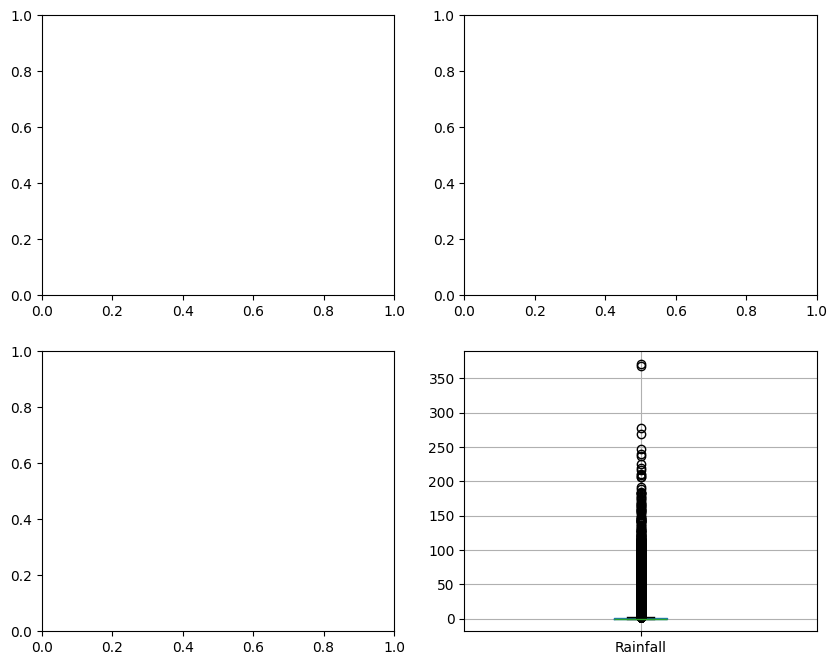

In [23]:
# Explore the numerical variables

fig, ax = plt.subplots(2,2, figsize=(10,8))
ax[0,0].plot(df.boxplot(column='Rainfall'))
fig.set_title('Rainfall')

ax[0,1].plot(df.boxplot(column='Evaporation'))
fig.set_title('Evaporation')

ax[1,0].plot(df.boxplot(column='WindSpeed9am'))
fig.set_title('WindSpeed9am')

ax[1,1].plot(df.boxplot(column='WindSpeed3pm'))
fig.set_title('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

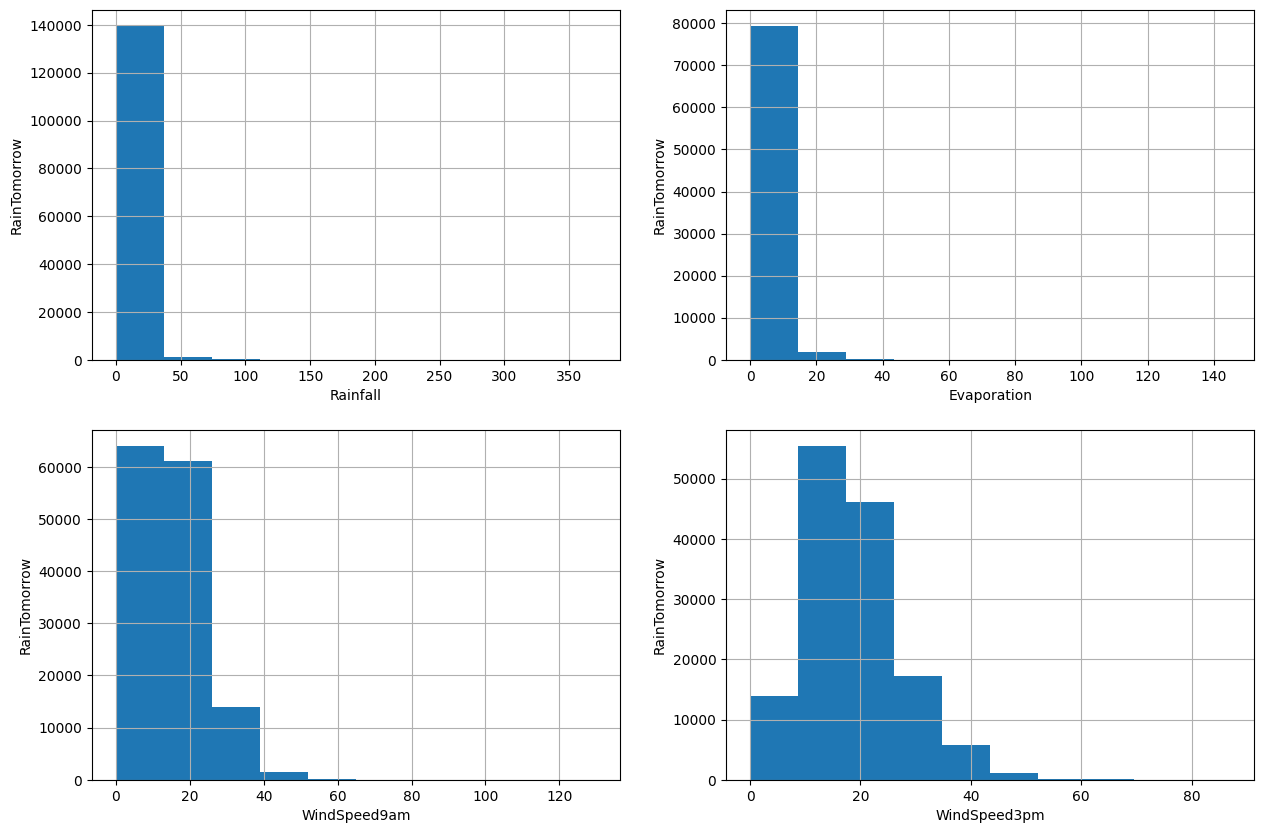

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [ ]:
# Declare target variable and feature vecture
y = df['RainTomorrow']
X = df.drop(['RainTomorrow'], axis=1)


In [ ]:
y.isnull().sum()

0

In [ ]:
# Split x and y into the training and testing sets 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)
print(f"Training shape: {X_train.shape}, Testing shape: {X_test.shape}")


Training shape: (113754, 24), Testing shape: (28439, 24)


In [ ]:
# deal with missing values

'''
Given the skewness of the dataset, we will use the median to impute missing data
'''

numerical = [col for col in X_train.columns if X_train[col].dtype != 'O']


for df1 in [X_train, X_test]:
    for col in numerical: 
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
del categorical[0]
del categorical[-1]
X_train[categorical].isnull().mean()

WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
dtype: float64

In [ ]:
for df2 in [X_train, X_test]:
    for i in categorical:
        df2[i].fillna(X_train[i].mode()[0],inplace=True)


X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday_0      0
RainToday_1      0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
# Encode categorical variables
## pip install for category encoders 
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)
X_train.head()

In [ ]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0','RainToday_1']],
                     pd.get_dummies(X_train.Location),
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [ ]:
y_train.isnull().sum()

0

In [ ]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0','RainToday_1']],
                     pd.get_dummies(X_test.Location),
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

# predict the model 

y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [ ]:
# Using the predict_proba method

logreg.predict_proba(X_test)[:,0]

array([0.86928969, 0.4834132 , 0.93952426, ..., 0.26389704, 0.95287159,
       0.69618732])

In [ ]:
# check the accuracy 

from sklearn.metrics import accuracy_score

print(f"Model accuracy: {accuracy_score(y_test, y_pred_test)}")

Model accuracy: 0.8487991842188544
